# INTRODUCTION
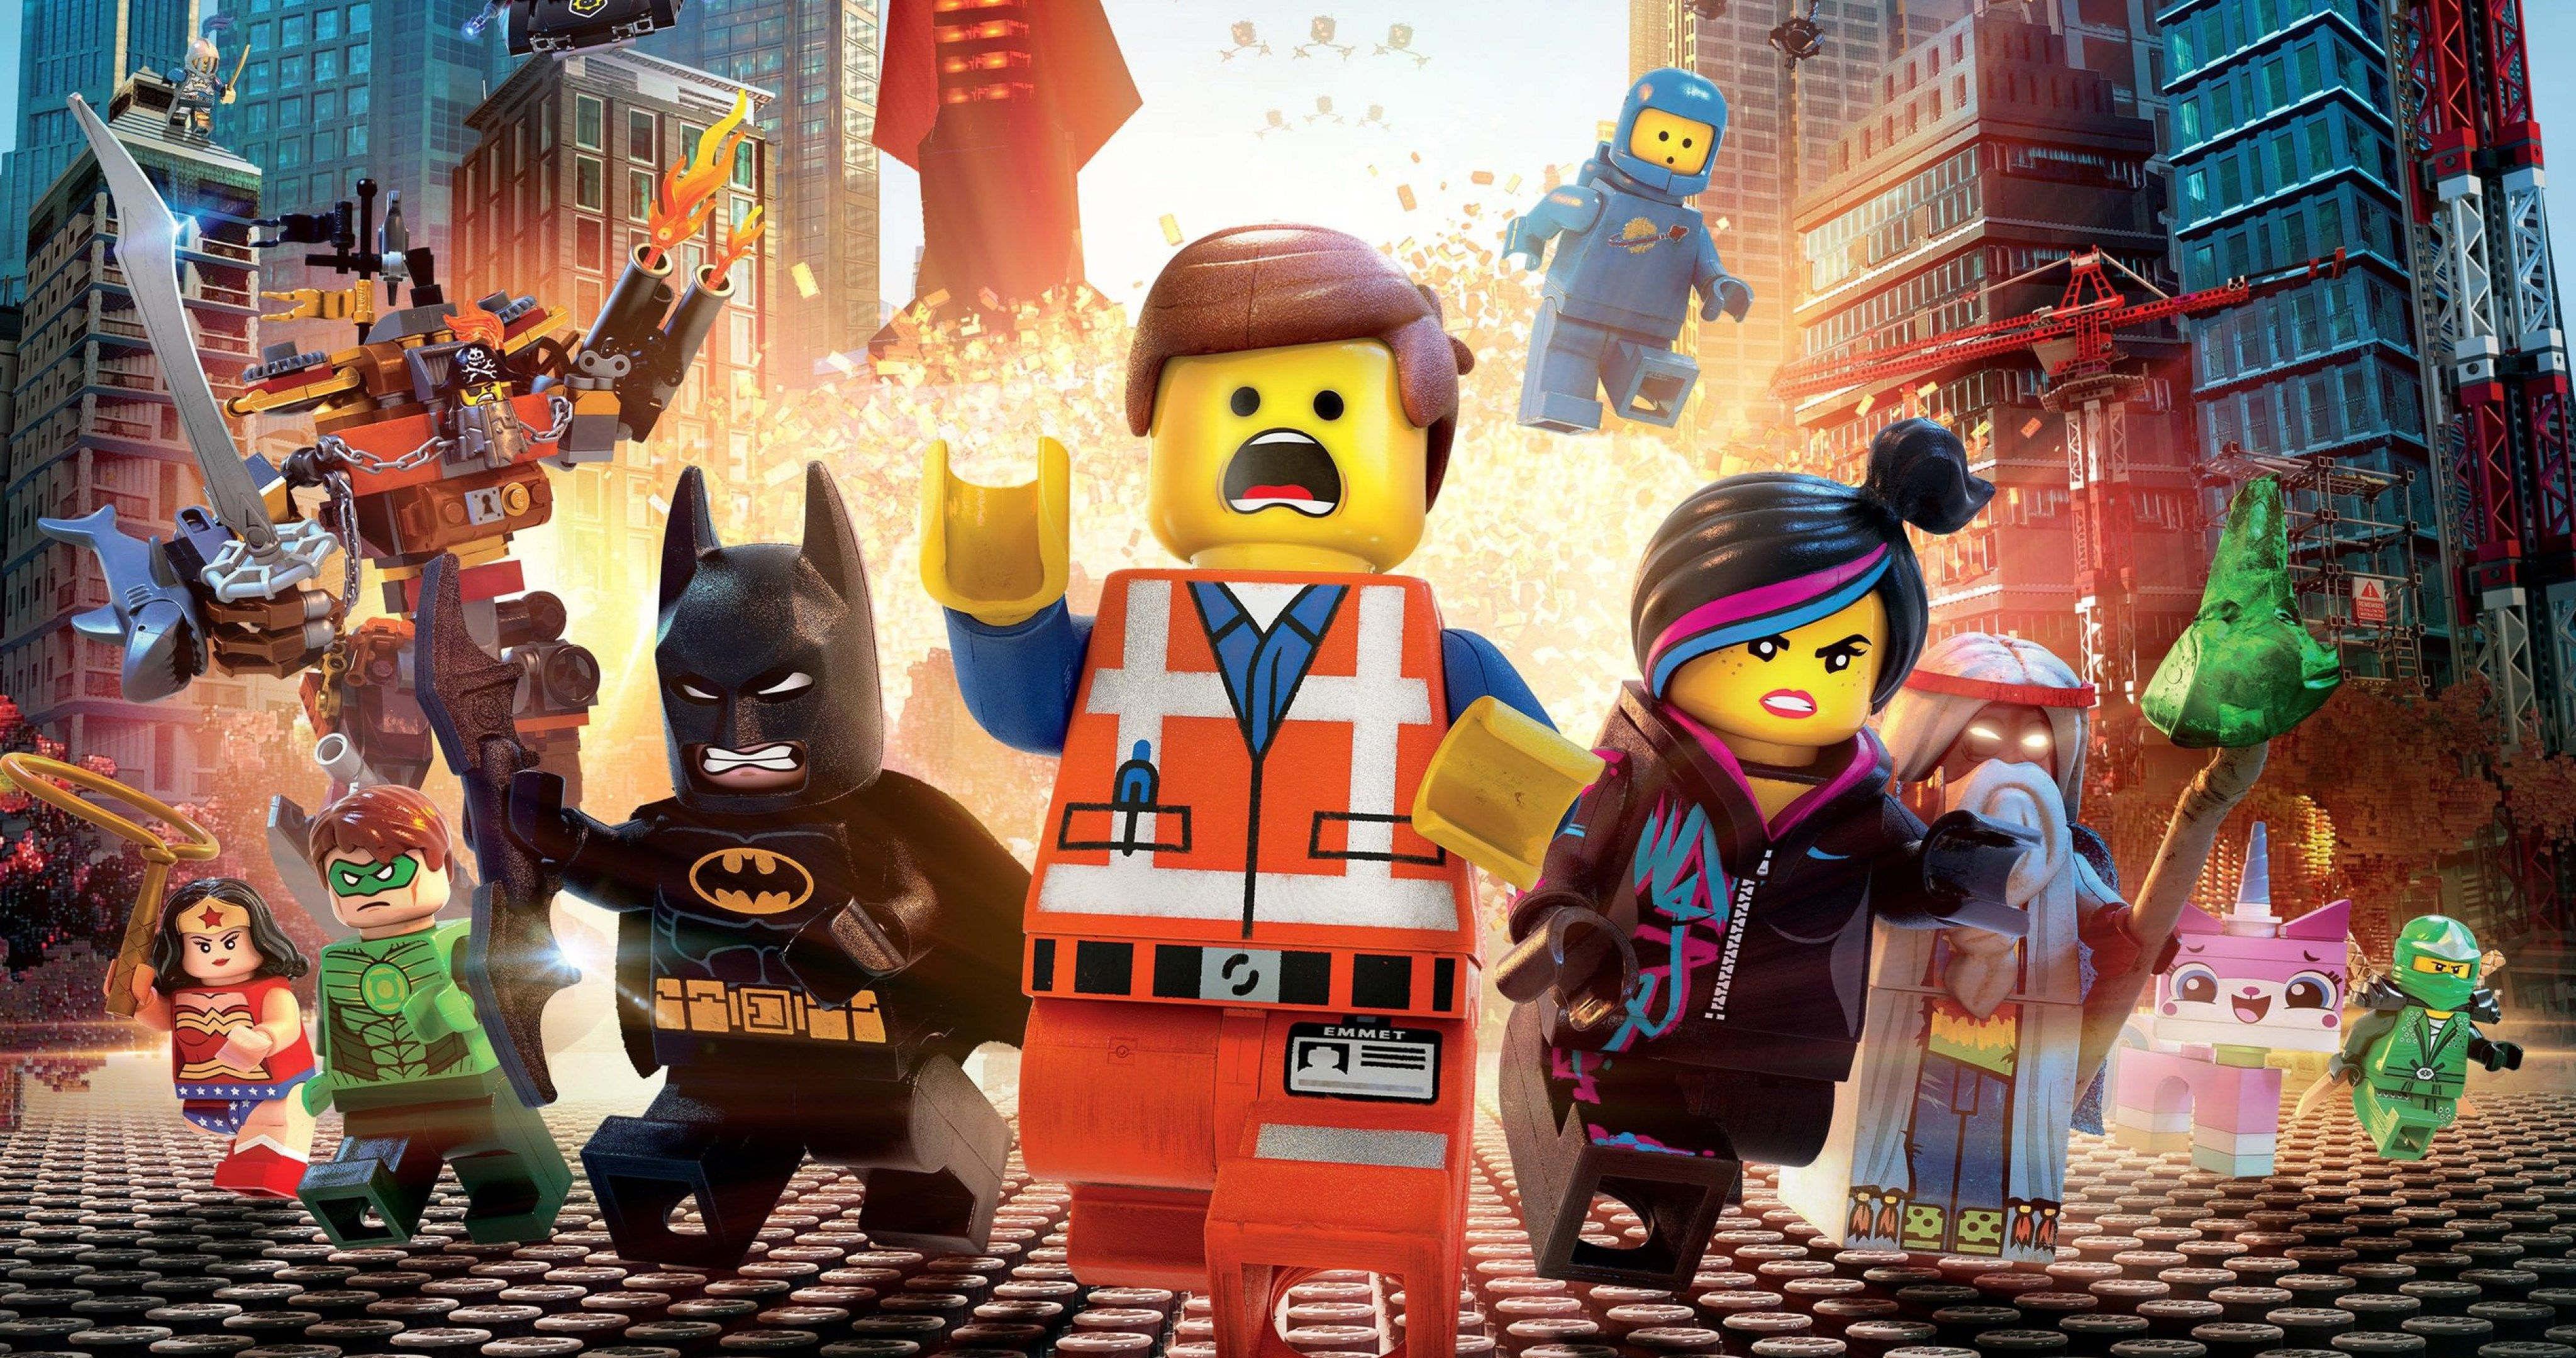
## Let's look at Lego sets!
#### Lego is a household name across the world, supported by a diverse toy line, hit movies, and a series of successful video games. In this project, we are going to explore a key development in the history of Lego: the introduction of licensed sets such as Star Wars, Super Heroes, and Harry Potter.

#### It may not be widely known, but Lego has had its share of ups and downs since its inception in the early 20th century. This includes a particularly rough period in the late 90s. As described in this article, Lego was only able to survive due to a successful internal brand (Bionicle) and the introduction of its first licensed series: Star Wars. In the instructions panel are the two questions you will need to answer to complete this project.

#### Before diving into our analysis though, let's become familiar with the two datasets that will help you with this project:

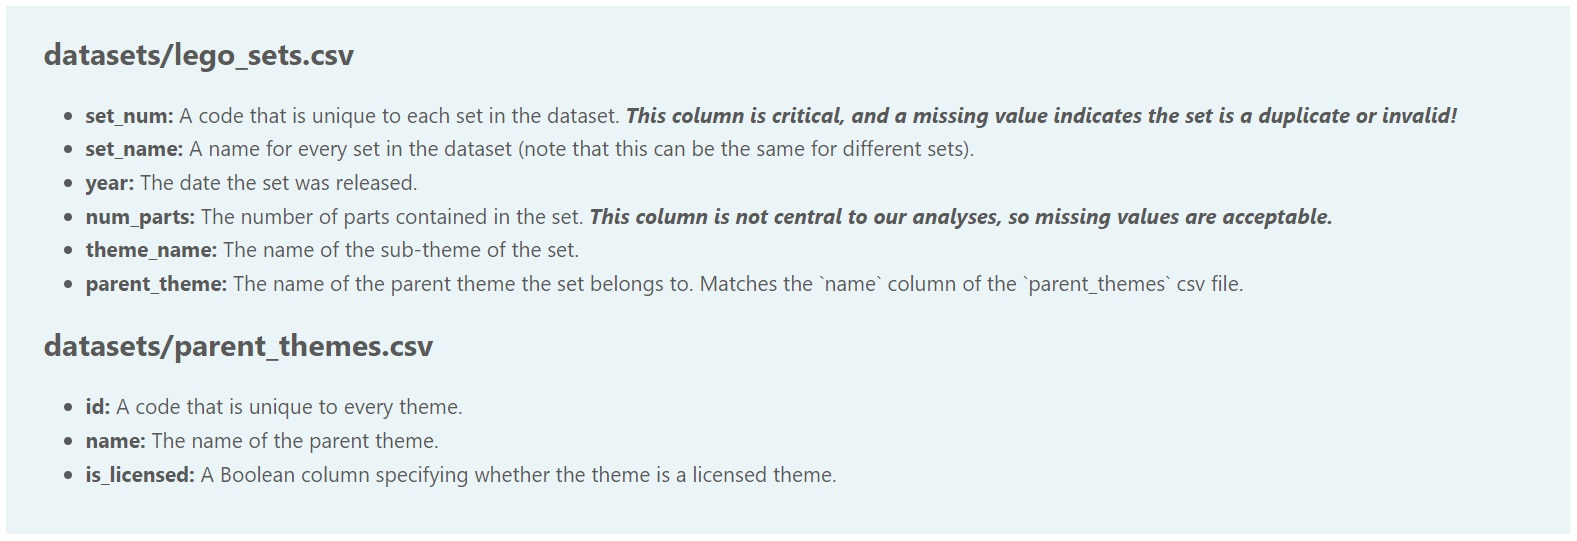

In [4]:
import pandas as pd

df = pd.read_csv(r'https://raw.githubusercontent.com/Aviisaud/lego-analysis/main/datasets/lego_sets.csv')
theme = pd.read_csv(r'https://raw.githubusercontent.com/Aviisaud/lego-analysis/main/datasets/parent_themes.csv')

In [5]:
df.isna().sum()

set_num          153
name             153
year               0
num_parts       5060
theme_name       153
parent_theme       0
dtype: int64

### Q1: What percentage of all licensed sets ever released were Star Wars themed?

In [6]:
## merging the lego_sets data with parent_themes data
merged_data = df.merge(theme, left_on='parent_theme', right_on='name')
merged_data.drop(columns='name_y', inplace=True)
merged_data.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False


In [7]:
# making dataframe of licensed theme only
licensed=merged_data[merged_data['is_licensed']]
licensed.isna().sum()

set_num         153
name_x          153
year              0
num_parts       577
theme_name      153
parent_theme      0
id                0
is_licensed       0
dtype: int64

In [8]:
# dropping the NA value in column 'set_num'
licensed = licensed.dropna(subset=['set_num'])
licensed.isna().sum()

set_num           0
name_x            0
year              0
num_parts       515
theme_name        0
parent_theme      0
id                0
is_licensed       0
dtype: int64

In [9]:
# Deleting the duplicate value from merge_data dataframe
merged_data=merged_data.drop_duplicates()
merged_data.isna().sum()

set_num          109
name_x           109
year               0
num_parts       5019
theme_name       109
parent_theme       0
id                 0
is_licensed        0
dtype: int64

In [10]:
#making dataframe of star wars theme in licensed data set
star_wars=licensed[licensed['parent_theme']=='Star Wars']

In [11]:
result = round((star_wars.shape[0]/licensed.shape[0])*100,2)
print('percentage of starwars =',result,'%')

percentage of starwars = 51.65 %


### Q2: In which year was Star Wars not the most popular licensed theme?

In [12]:
licensed_sorted=licensed.sort_values('year') #sort value by 'year'
licensed_sorted['count']=1
licensed_sorted.head(10)

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed,count
3702,7161-1,Gungan Sub,1999,379.0,Star Wars Episode 1,Star Wars,158,True,1
3705,7171-1,Mos Espa Podrace,1999,NaN,Star Wars Episode 1,Star Wars,158,True,1
3690,7140-1,X-wing Fighter,1999,271.0,Star Wars Episode 4/5/6,Star Wars,158,True,1
3685,7130-1,Snowspeeder,1999,NaN,Star Wars Episode 4/5/6,Star Wars,158,True,1
3684,7128-1,Speeder Bikes,1999,93.0,Star Wars Episode 4/5/6,Star Wars,158,True,1
3691,7141-1,Naboo Fighter,1999,179.0,Star Wars Episode 1,Star Wars,158,True,1
3680,7121-1,Naboo Swamp,1999,82.0,Star Wars Episode 1,Star Wars,158,True,1
3686,7131-1,Anakin's Podracer,1999,136.0,Star Wars Episode 1,Star Wars,158,True,1
3675,7110-1,Landspeeder,1999,NaN,Star Wars Episode 4/5/6,Star Wars,158,True,1
3696,7150-1,TIE Fighter & Y-wing,1999,NaN,Star Wars Episode 4/5/6,Star Wars,158,True,1


In [16]:
sum_df = licensed_sorted.groupby(['year','parent_theme']).sum().reset_index() # grouping it by 'year' & 'parent_theme'
sum_df.head(20)
# https://stackoverflow.com/questions/15705630/get-the-rows-which-have-the-max-value-in-groups-using-groupby 
max_df = sum_df.sort_values('count',ascending=False).drop_duplicates(['year'])
max_df.sort_values('year')

,year,parent_theme,num_parts,id,is_licensed,count
0,1999,Star Wars,1384.0,2054,13,13
2,2000,Star Wars,2580.0,4108,26,26
4,2001,Star Wars,2949.0,2212,14,14
6,2002,Star Wars,4735.0,4424,28,28
9,2003,Star Wars,6660.0,5056,32,32
12,2004,Star Wars,1659.0,3160,20,20
16,2005,Star Wars,4730.0,4424,28,28
20,2006,Star Wars,2769.0,1738,11,11
24,2007,Star Wars,11361.0,2528,16,16
28,2008,Star Wars,6865.0,3634,23,23


In [17]:
x=max_df['count'].max()
print('The year that Star Wars not the most popular licensed theme=',x)

The year that Star Wars not the most popular licensed theme= 72
